In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

heart=pd.read_csv('C:\\Users\\DELL\\Downloads\\heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
pip install proplot

Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Count of features per data type:")
heart.dtypes.value_counts()

Count of features per data type:


int64      6
object     5
float64    1
dtype: int64

In [4]:
print('Number of duplicates:',len(heart[heart.duplicated()]))
print('Number of Missing Values:',heart.isnull().sum().sum())

Number of duplicates: 0
Number of Missing Values: 0


In [5]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
heart['FastingBS']=heart['FastingBS'].astype(str)
heart['HeartDisease']=heart['HeartDisease'].astype(str)

In [7]:
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15,color='black')
    plt.xticks(fontsize=15,color='black')
    plt.box(False)
    plt.title(i[1],fontsize=24,color='black')
    plt.tight_layout(pad=5.0)

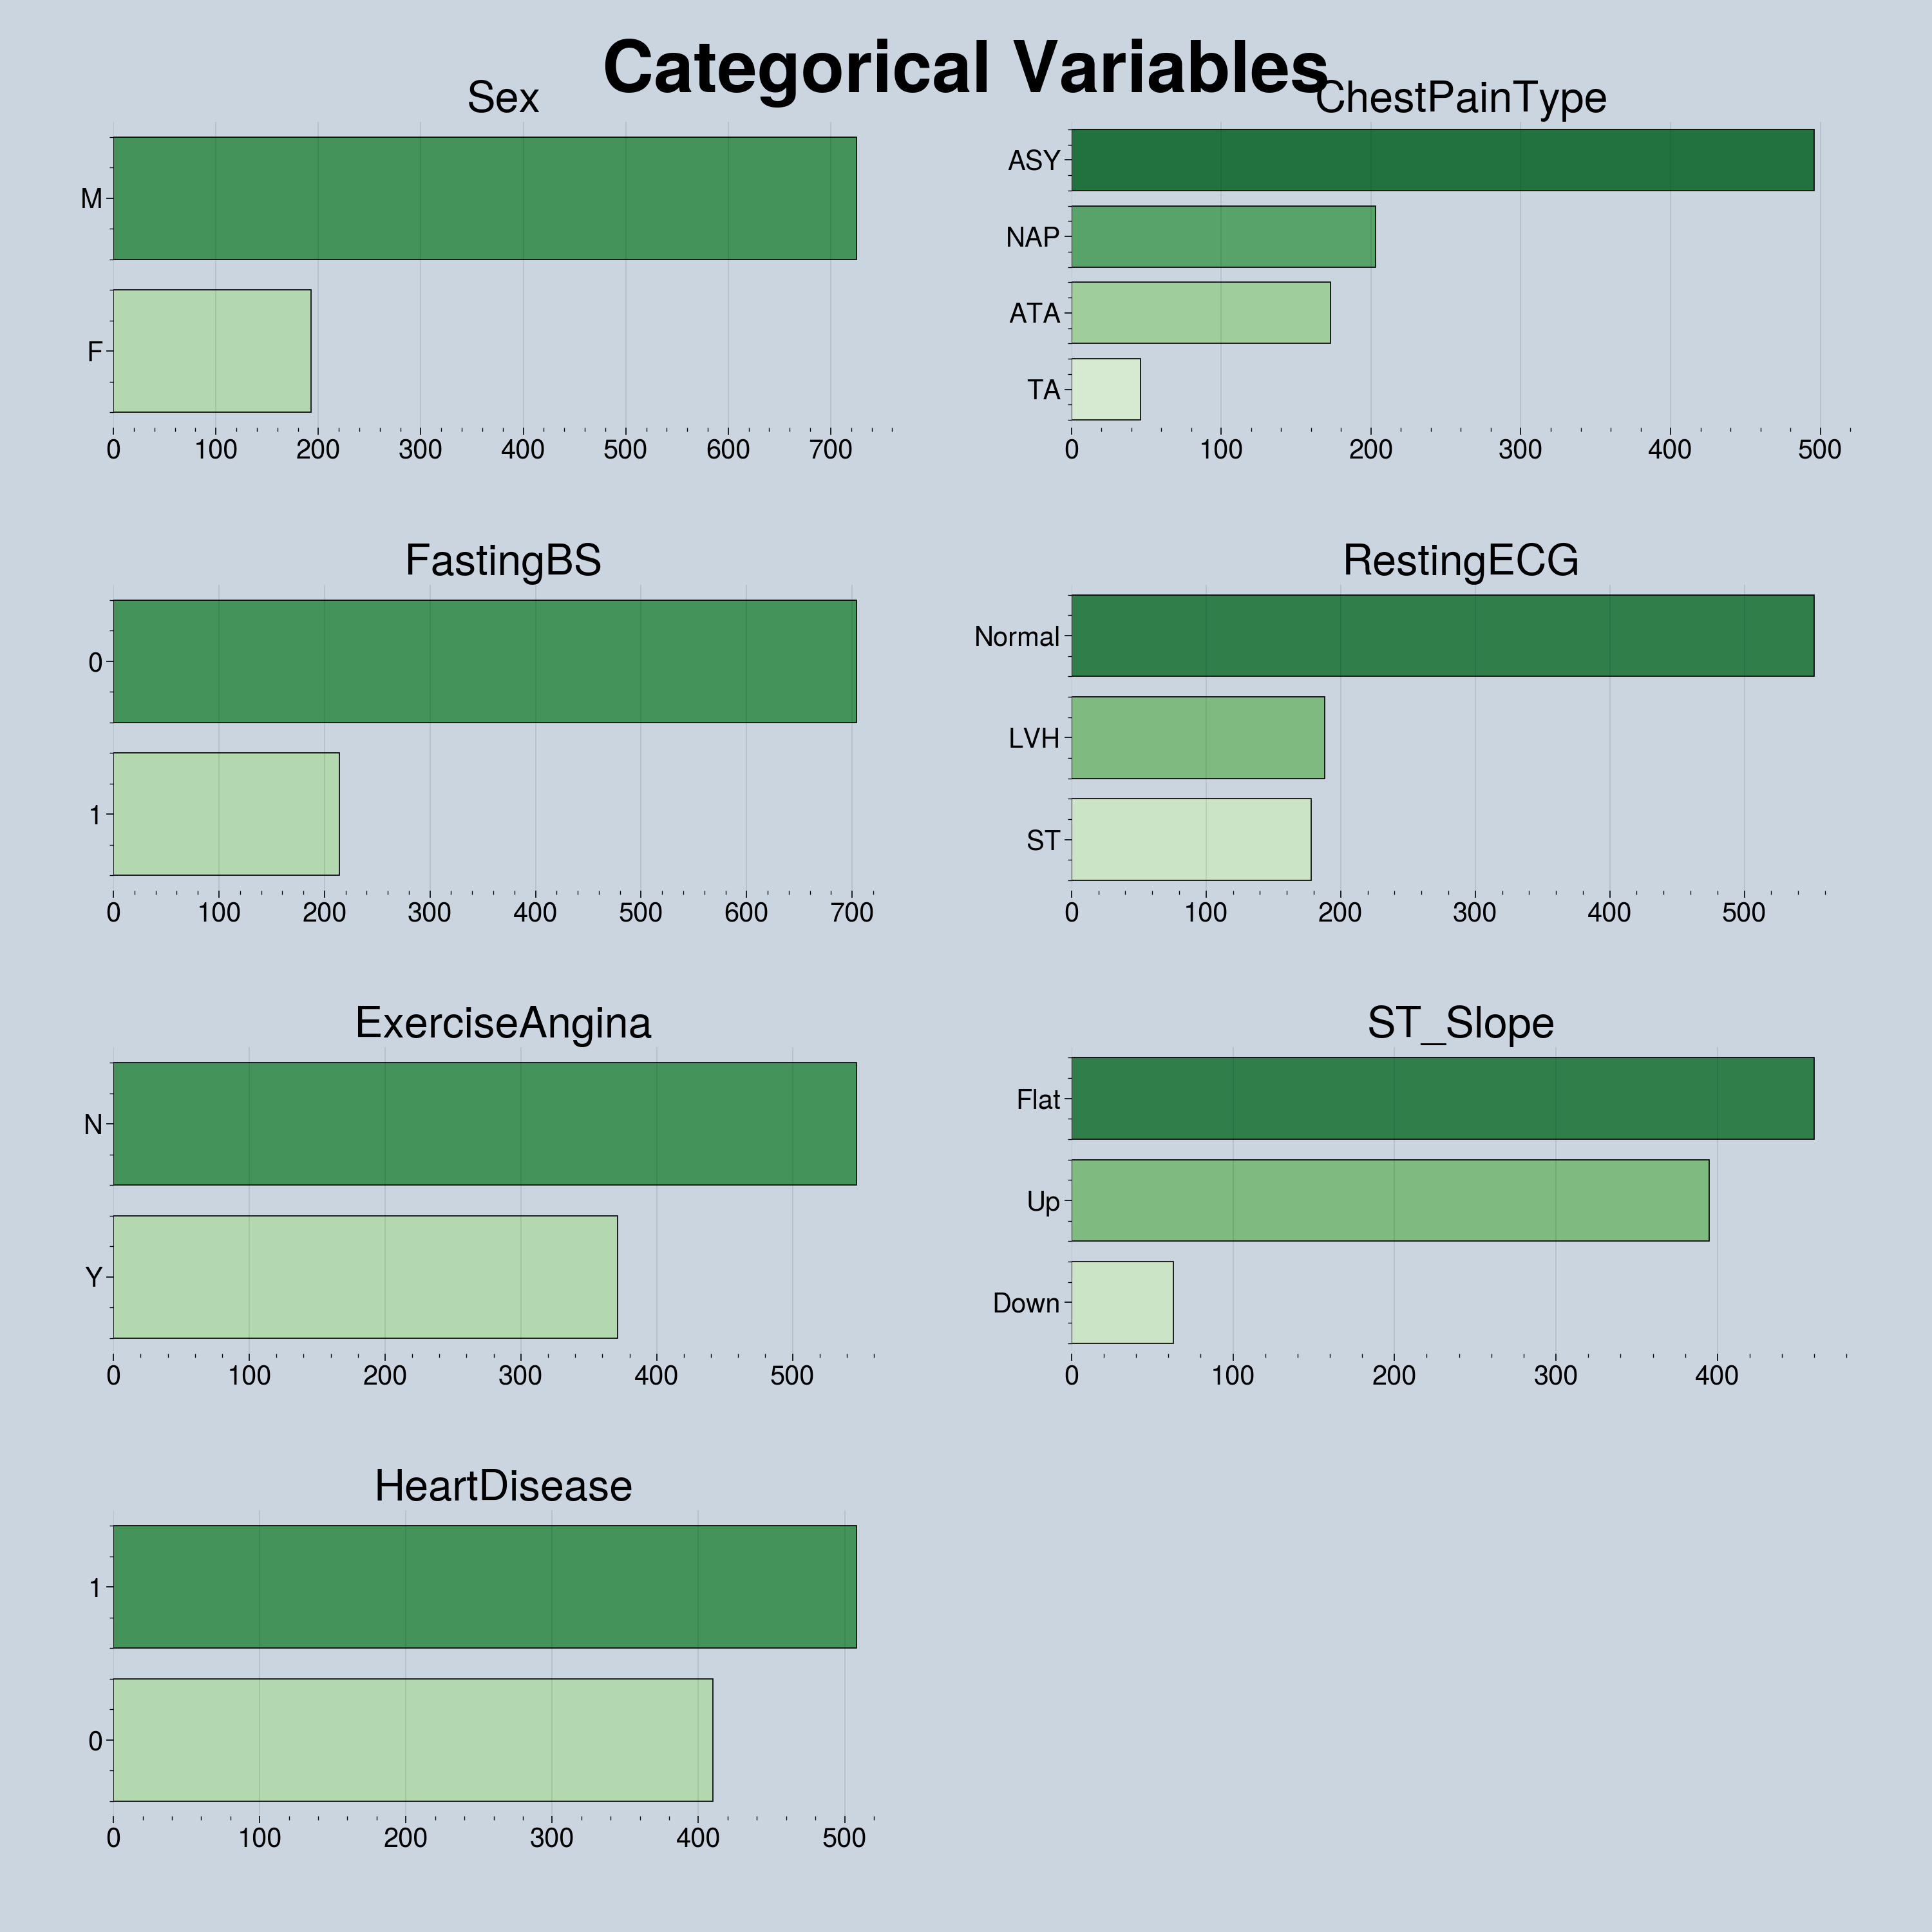

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import proplot as pplt

categ=heart.select_dtypes(include=object).columns

fig,ax=plt.subplots(figsize=(15,15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family']='TeX Gyre Heros'

for i in (enumerate(categ)):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(y=i[1],data=heart,order=heart[i[1]].value_counts().index,palette='Greens_r',edgecolor='black')
    plot_design()
    plt.suptitle('Categorical Variables',fontsize=40)

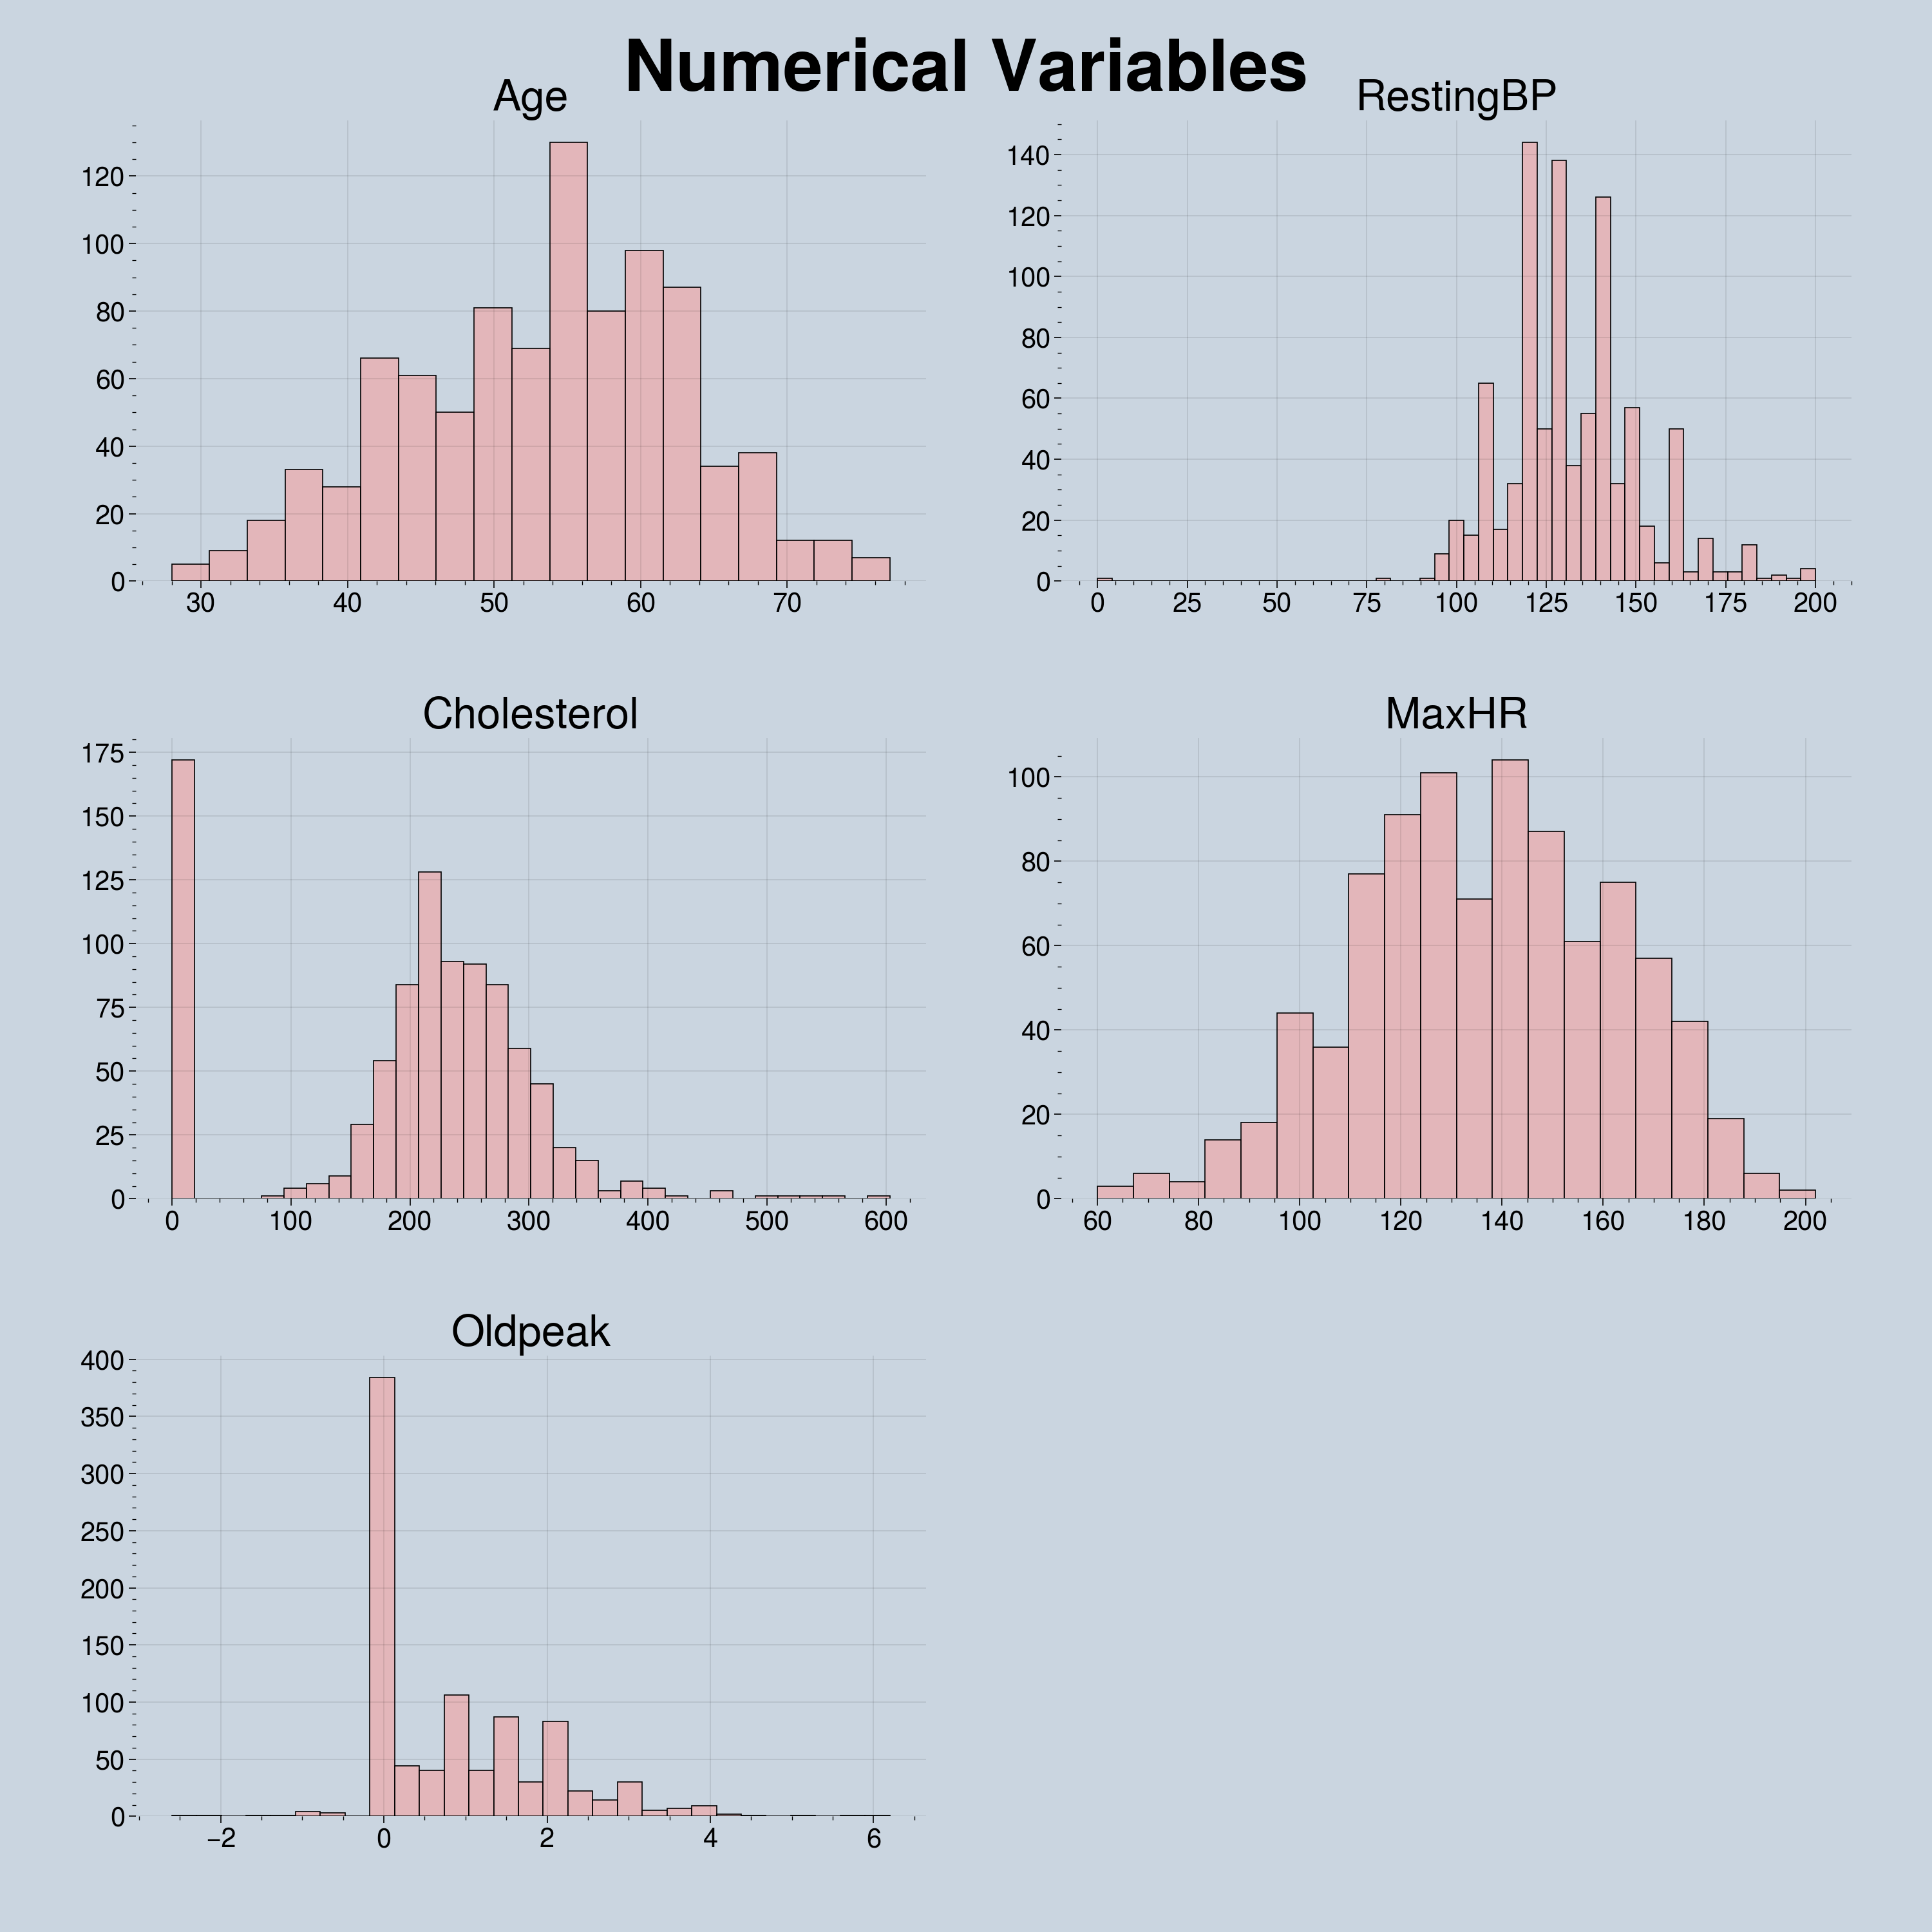

In [9]:
numeric=heart.select_dtypes(exclude=object).columns
fig,ax=plt.subplots(figsize=(15,15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family']='TeX Gyre Heros'

for i in (enumerate(numeric)):
    plt.subplot(3,2,i[0]+1)
    sns.histplot(x=i[1],data=heart,color='#ECACAE',edgecolor='black')
    plot_design()
    plt.suptitle('Numerical Variables',fontsize=40)

In [10]:
from sklearn.preprocessing import MinMaxScaler
for col in numeric:
    heart[col]=MinMaxScaler().fit_transform(heart[[col]])

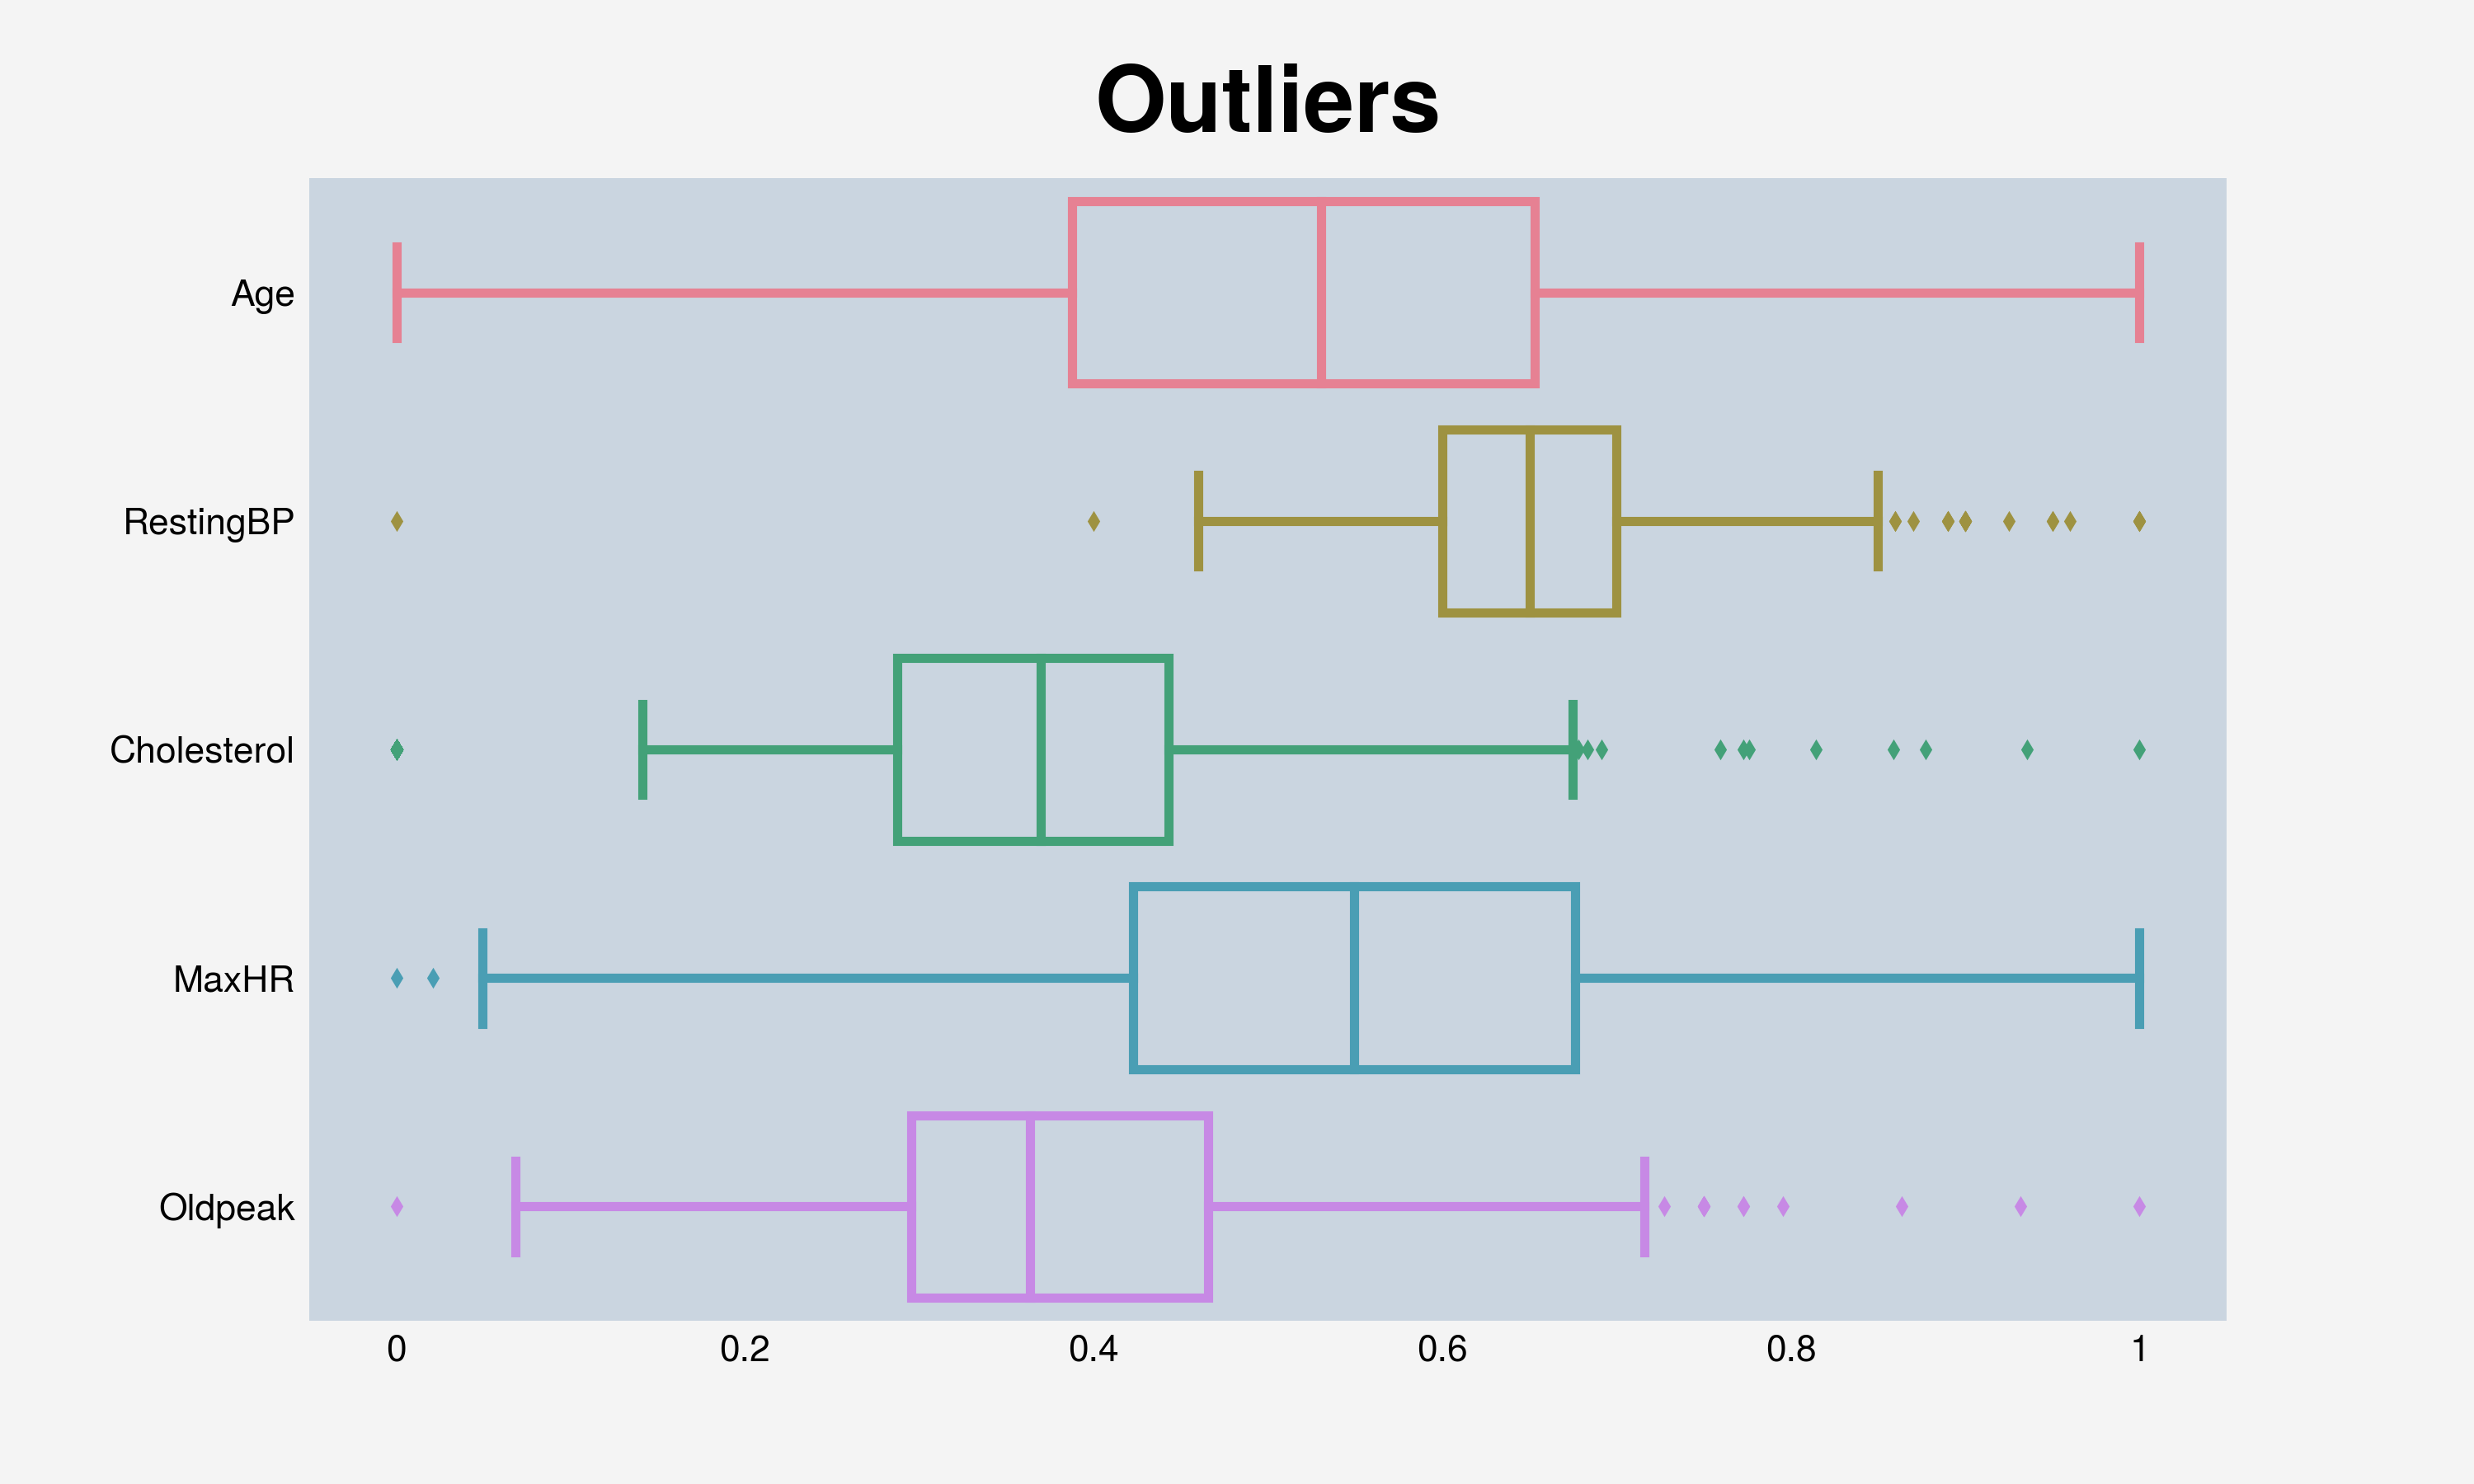

In [11]:
fig,ax=plt.subplots(figsize=(15,9))
ax.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family']='TeX Gyre Heros'
sns.boxplot(data=heart,ax=ax,palette='husl',orient='h',linewidth=4);
for i,artist in enumerate(ax.artists):
    col=artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line =ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
    
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for i in ['top','bottom','left','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(False)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

ax.set_title('Outliers',fontsize=40,fontweight='bold',pad=20);

In [12]:
heart=heart.drop(heart[(heart['RestingBP']==0)].index)

In [13]:
q1=heart['RestingBP'].quantile(0.25)
q3=heart['RestingBP'].quantile(0.75)
iqr=q3-q1
Lower_tail=q1-1.5*iqr
Upper_tail=q3+1.5*iqr

u=heart[(heart['RestingBP']>=Upper_tail)|(heart['RestingBP']<=Lower_tail)]
u=pd.DataFrame(u)
print('Outliers on RestingBP:')
u['HeartDisease'].value_counts()

Outliers on RestingBP:


1    17
0    10
Name: HeartDisease, dtype: int64

In [14]:
med =np.median(heart['RestingBP'])
for i in heart['RestingBP']:
    if i> Upper_tail or i<Lower_tail:
        heart['RestingBP']=heart['RestingBP'].replace(i,med)

In [15]:
q1=heart['Cholesterol'].quantile(0.25)
q3=heart['Cholesterol'].quantile(0.75)
iqr=q3-q1
Lower_tail=q1-1.5*iqr
Upper_tail=q3+1.5*iqr
u=heart[(heart['Cholesterol']>=Upper_tail)|(heart['Cholesterol']<=Lower_tail)]
u=pd.DataFrame(u)
print('Outliers on Cholestrol:')
u['HeartDisease'].value_counts()


Outliers on Cholestrol:


1    158
0     25
Name: HeartDisease, dtype: int64

In [16]:
z=heart[heart['Cholesterol']==0]
z=pd.DataFrame(z)
print('Outliers on cholesterol equal to 0:')
z['HeartDisease'].value_counts()

Outliers on cholesterol equal to 0:


1    151
0     20
Name: HeartDisease, dtype: int64

In [17]:
med =np.median(heart['Cholesterol'])
for i in heart['Cholesterol']:
    if i>Upper_tail:
        heart['Cholesterol']=heart['Cholesterol'].replace(i,med)

In [18]:
q1=heart['MaxHR'].quantile(0.25)
q3=heart['MaxHR'].quantile(0.75)
iqr=q3-q1
Lower_tail=q1-1.5*iqr
Upper_tail=q3+1.5*iqr
u=heart[(heart['MaxHR']>=Upper_tail)|(heart['MaxHR']<=Lower_tail)]
u=pd.DataFrame(u)
print('Outliers on MaxHR:')
u['HeartDisease'].value_counts()

Outliers on MaxHR:


1    2
Name: HeartDisease, dtype: int64

In [19]:
q1=heart['Oldpeak'].quantile(0.25)
q3=heart['Oldpeak'].quantile(0.75)
iqr=q3-q1
Lower_tail=q1-1.5*iqr
Upper_tail=q3+1.5*iqr
u=heart[(heart['Oldpeak']>=Upper_tail)|(heart['Oldpeak']<=Lower_tail)]
u=pd.DataFrame(u)
u['HeartDisease'].value_counts()


1    15
0     1
Name: HeartDisease, dtype: int64

In [20]:
heart['FastingBS']=heart['FastingBS'].astype(int)
heart['HeartDisease']=heart['HeartDisease'].astype(int)

In [21]:
categ=heart.select_dtypes(include=object).columns

heart=pd.get_dummies(heart,columns=categ,drop_first=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
y,X=heart['HeartDisease'],heart.drop(columns='HeartDisease')


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lr=LogisticRegression(solver='liblinear').fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8841
F1 Score: 0.903


In [24]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)
y_pred=lr_l1.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8949
F1 Score: 0.9124


In [25]:
lr_l2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)
y_pred=lr_l2.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8986
F1 Score: 0.9157


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8261
F1 Score: 0.8509


In [27]:
max_k=20
f1_scores=list()
error_rates=list()
for k in range(1,max_k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train)
    
    y_pred=knn.predict(X_test)
    f1=f1_score(y_pred,y_test)
    f1_scores.append((k,round(f1_score(y_test,y_pred),4)))
    error=1-round(accuracy_score(y_test,y_pred),4)
    error_rates.append((k,error))
    
f1_results=pd.DataFrame(f1_scores,columns=['K','F1 Score'])
error_results=pd.DataFrame(error_rates,columns=['K','Error Rate'])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


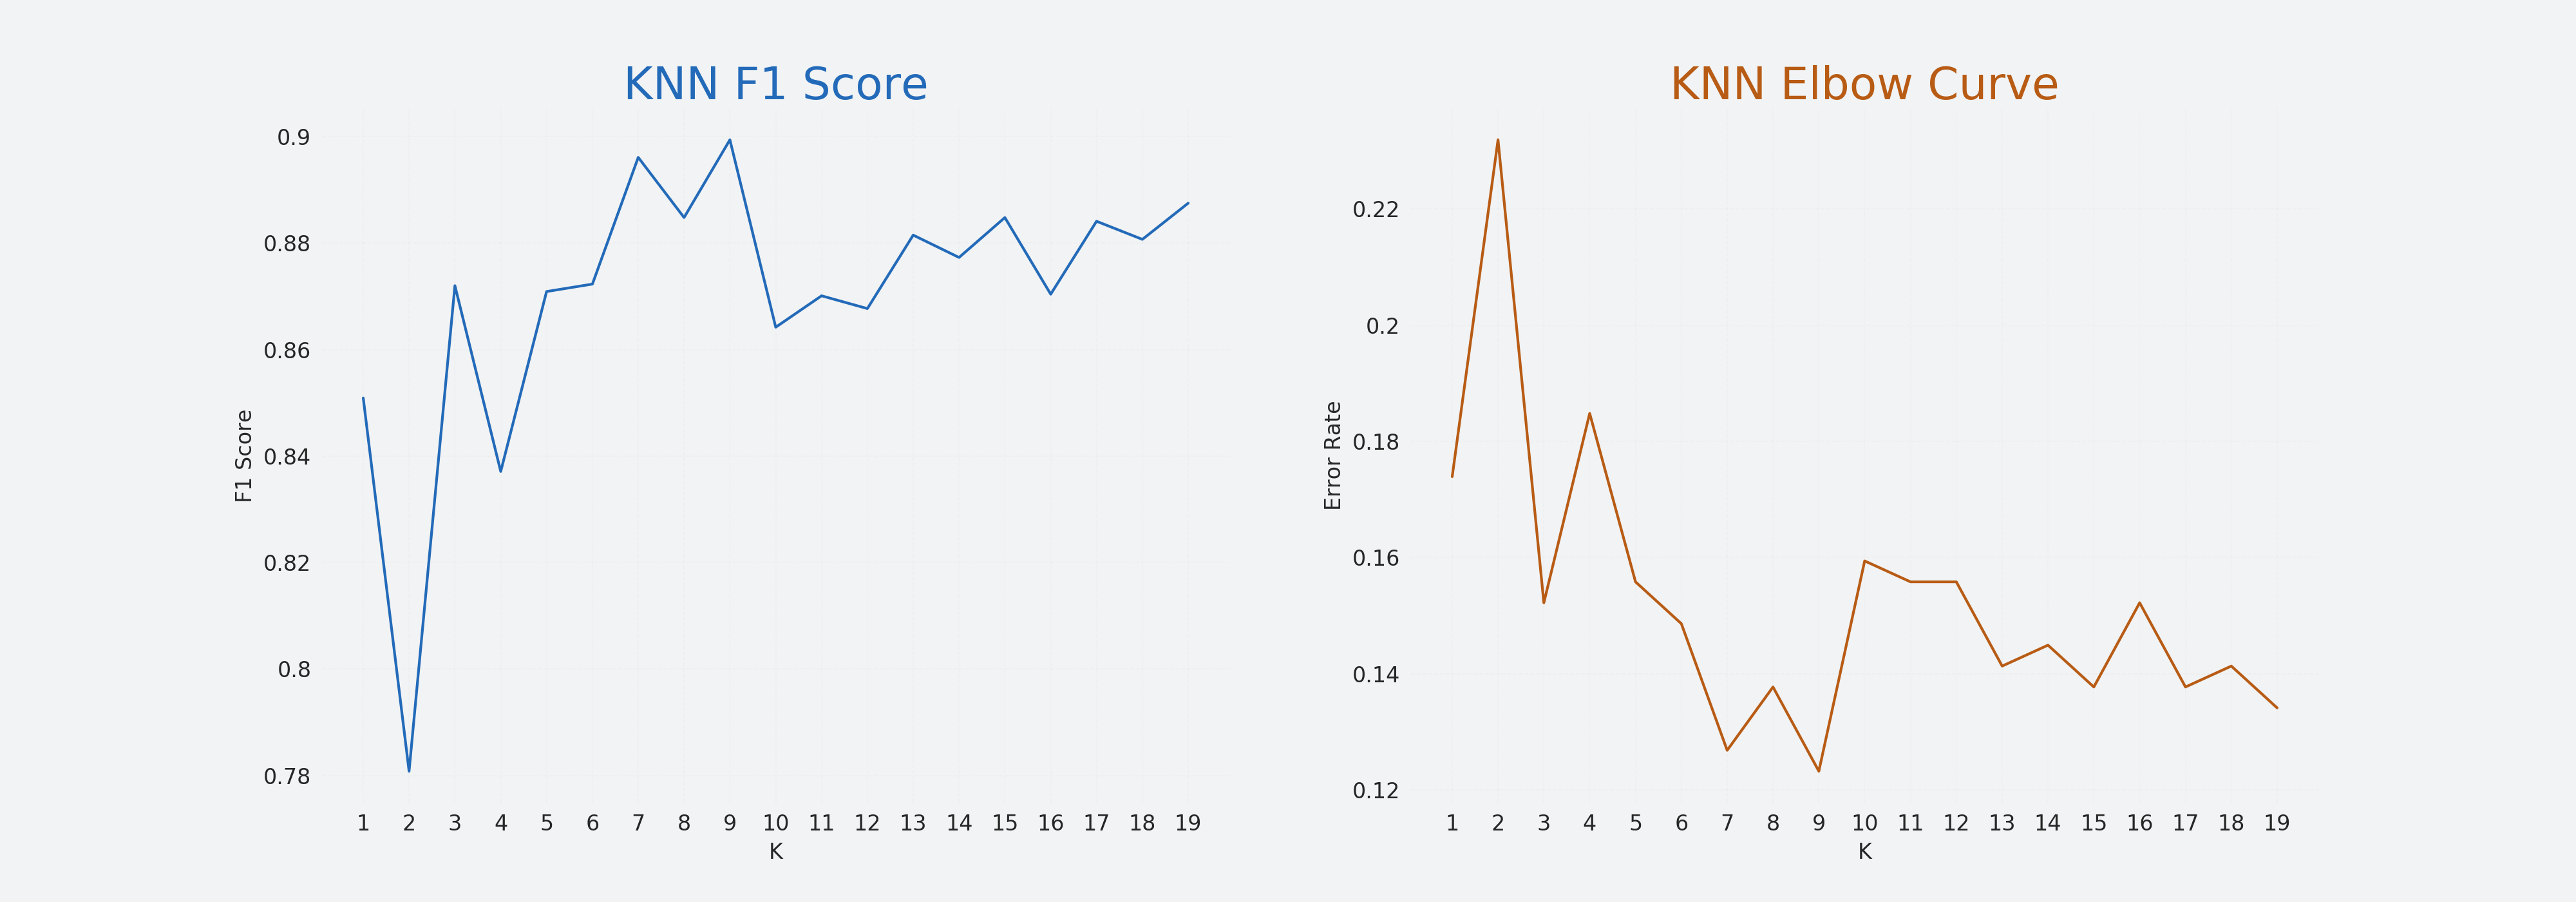

In [28]:
mpl.rcParams['font.size']=12
sns.set_style('whitegrid',{'grid.linestyle':'--'})
mpl.rcParams['font.sans-serif']=['AppleGothic']
fig,(ax_f1,ax_error)=plt.subplots(1,2,figsize=(20,7))
fig.patch.set_facecolor('#F1F3F4')
ax_f1.patch.set_facecolor('#F1F3F4')
ax_error.patch.set_facecolor("#F1F3F4")

sns.lineplot(f1_results['K'],f1_results['F1 Score'],color='#236AB9',ax=ax_f1)
sns.lineplot(error_results['K'],error_results['Error Rate'],color='#B85B14',ax=ax_error)


ax_f1.set_title('KNN F1 Score',color='#236AB9',fontsize=25)
ax_error.set_title('KNN Elbow Curve',color='#B85B14',fontsize=25)


ax_f1.set_xticks(range(1,20))
ax_error.set_xticks(range(1,20))

for i in ['top','bottom','left','right']:
    ax_f1.spines[i].set_visible(False)
    
for i in ['top','bottom','left','right']:
    ax_error.spines[i].set_visible(False)

In [29]:
conda install -c conda-forge scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8768
F1 Score: 0.8994


In [31]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8623
F1 Score: 0.8848


In [32]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100],'kernel':['linear']},
           {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
           {'C':[1,10,100],'kernel':['poly'],'degree':[2,3],'gamma':[0.01,0.02,0.03,0.04,0.05]}]
grid_search=GridSearchCV(estimator=svm,
                        param_grid=parameters,
                        scoring='f1',
                        cv=5,
                        verbose=0)
grid_search.fit(X_train,y_train)
print("best score:",grid_search.best_score_)
print("best param:",grid_search.best_params_)

best score: 0.8638816059049341
best param: {'C': 100, 'kernel': 'linear'}


In [33]:
svm=SVC(C=100,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8768
F1 Score: 0.897


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt=dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8116
F1 Score: 0.8385


In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42,n_estimators=100)
RF=RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8768
F1 Score: 0.8994


In [36]:
n_estimators=[100,150,200]
max_depth=[15,20,25]
max_depth.append(None)
max_features=['auto','sqrt']
min_samples_split=[5,10,15]
min_samples_leaf=[1,2]
bootstrap=[True,False]
params={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
RF=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(estimator=RF,
                        param_grid=params,
                        scoring='f1',
                        cv=5,
                        verbose=0,
                        n_jobs=-1)
grid_search.fit(X_train,y_train)
print("best score:",grid_search.best_score_)
print('best param:',grid_search.best_params_)

best score: 0.8812959007290235
best param: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [37]:
best_params=grid_search.best_params_
RF=RandomForestClassifier(random_state=42,**best_params)
RF=RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))

Accuracy score: 0.8913
F1 Score: 0.9123


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid={
    'learning_rate':[0.01,0.025,0.05,0.075,0.1],
    'n_estimators':[140,150,160],
    'max_depth':[3,4,5]
}
GV_GBC=GridSearchCV(GradientBoostingClassifier(random_state=42),
                   param_grid=param_grid,
                   scoring='f1',
                   cv=5,
                   verbose=0,
                   n_jobs=-1)
GV_GBC=GV_GBC.fit(X_train,y_train)
print('best score:',GV_GBC.best_score_)
print('best param:',GV_GBC.best_params_)

best score: 0.8667846499995109
best param: {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 140}


In [39]:
best_params=GV_GBC.best_params_
GB=GradientBoostingClassifier(random_state=42,**best_params)
GB=GB.fit(X_train,y_train)
y_pred=GB.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))


Accuracy score: 0.9058
F1 Score: 0.924


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,random_state=42))
param_grid={'learning_rate':[0.01,0.025,0.05,0.075,0.1],
           'n_estimators':[140,150,160]}
GV_ABC=GridSearchCV(ABC,
                   param_grid=param_grid,
                   scoring='f1',
                   n_jobs=-1)
GV_ABC=GV_ABC.fit(X_train,y_train)
y_pred=GV_ABC.predict(X_test)
print('best param:',GV_ABC.best_params_)
print('Accuracy score:',round(accuracy_score(y_test,y_pred),4))
print('F1 Score:',round(f1_score(y_test,y_pred),4))



best param: {'learning_rate': 0.025, 'n_estimators': 140}
Accuracy score: 0.9022
F1 Score: 0.9208
